In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [55]:
#Importing ans loading data from MNIST database
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

In [56]:
#Scaling the input
train_images=train_images/255.0
test_images=test_images/255.0

In [92]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [93]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2608 - acc: 0.9250
Epoch 2/5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.1149 - acc: 0.9661
Epoch 3/5
60000/60000 [==============================] - 14s 234us/sample - loss: 0.0785 - acc: 0.9766
Epoch 4/5
60000/60000 [==============================] - 12s 192us/sample - loss: 0.0595 - acc: 0.9820
Epoch 5/5
60000/60000 [==============================] - 8s 141us/sample - loss: 0.0459 - acc: 0.9851


In [94]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.0812 - acc: 0.9741
Test accuracy: 0.9741


In [95]:
predictions = model.predict(test_images)

In [96]:
print('Prediction:', np.argmax(predictions[0]))
print('Actual value:',test_labels[0])

Prediction: 7
Actual value: 7


In [97]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

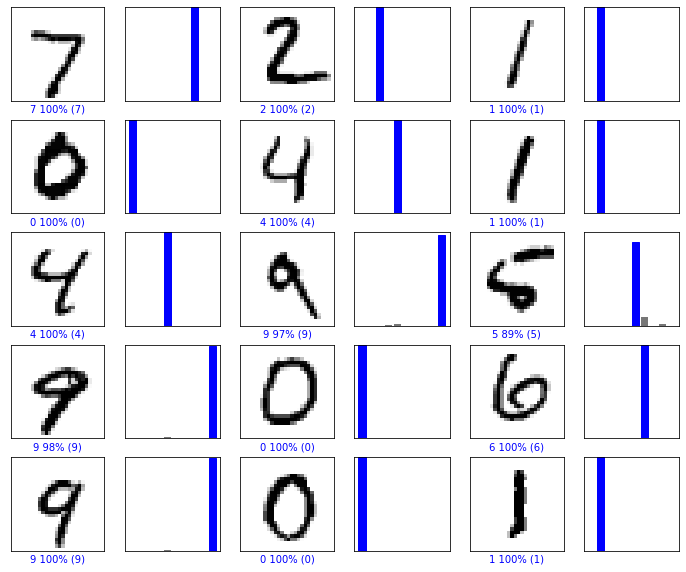

In [98]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()